In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# this is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
#encoding_dim = 3
encoding_dim = 25


# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(676, activation='relu')(input_img) #26X26
encoded = Dense(484, activation='relu')(encoded) #22X22
encoded = Dense(324, activation='relu')(encoded)  #18X18
encoded = Dense(144, activation='relu')(encoded)  #12X12
encoded = Dense(64, activation='relu')(encoded)  #8X8
#encoded = Dense(20, activation='sigmoid')(encoded)  

encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [2]:
print (encoding_dim)
print (input_img)
print (encoded)
print (decoded)
print (autoencoder)

25
input_1
Elemwise{mul,no_inplace}.0
sigmoid.0


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [4]:
print (encoder)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [6]:
print (encoded_input)
print (decoder_layer)
print (decoder)

input_2


In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train)
print(x_test)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]

In [20]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [21]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(len(x_train))
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
print (x_train.dtype)
print (x_test.dtype)
print (x_train)
print (x_test)

60000
(60000, 784)
(10000, 784)
(60000,)
(10000,)
float32
float32
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [22]:
nfold=10
nb_epoch=50
batch_size=256
random_state =33

In [23]:
kfold_weights_path = os.path.join('mnist_weights_kfold_' + str(nfold) + 
                                  '_epoch_'+str(nb_epoch)+
                                  '_batch_'+str(batch_size)
                                  +'.h5')
print(kfold_weights_path)

mnist_weights_kfold_10_epoch_50_batch_256.h5


In [24]:
kf = KFold(len(x_train), n_folds=nfold, shuffle=True, random_state=random_state)
print(kf)

sklearn.cross_validation.KFold(n=60000, n_folds=10, shuffle=True, random_state=33)


In [25]:
train_full_encoded_imgs = np.zeros(shape=[x_train.shape[0],encoding_dim])
print(train_full_encoded_imgs.shape)
print(x_test.shape)
test_full_encoded_imgs = np.zeros(shape=[x_test.shape[0],encoding_dim])
test_full_decoded_imgs = np.zeros(shape=[x_test.shape[0],x_test.shape[1]])
print(test_full_encoded_imgs.shape)
print(test_full_decoded_imgs.shape)

(60000, 25)
(10000, 784)
(10000, 25)
(10000, 784)


In [26]:
os.path.isfile(kfold_weights_path)

False

In [27]:
num_fold = 0
restore_from_last_checkpoint=0
for train_index,valid_index in kf:
    s_train,s_valid  = x_train[train_index], x_train[valid_index]
    
    noise_factor = 0.1
    s_train_noisy = s_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=s_train.shape) 
    s_valid_noisy = s_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=s_valid.shape) 

    s_train_noisy = np.clip(s_train_noisy, 0., 1.)
    s_valid_noisy = np.clip(s_valid_noisy, 0., 1.)
    #y_train, y_test = y[train_index], y[test_index]
    
    num_fold += 1
    print('\n\nStart KFold number {} from {}'.format(num_fold, nfold))
    print('Split train: ', len(s_train_noisy), len(s_train))
    print('Split valid: ', len(s_valid_noisy), len(s_valid))

    if not os.path.isfile(kfold_weights_path) or restore_from_last_checkpoint == 0:
        callbacks = [
                EarlyStopping(monitor='val_loss', patience=1, verbose=0),
                ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
        ]
        autoencoder.fit(s_train_noisy, s_train,
                nb_epoch=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(s_valid_noisy, s_valid),
                callbacks=callbacks)
    #if os.path.isfile(kfold_weights_path):
    #    autoencoder.load_weights(kfold_weights_path)
    
    # Store train predictions
    train_encoded_imgs = encoder.predict(x_train,batch_size=batch_size, verbose=1)
    train_full_encoded_imgs = np.add(train_full_encoded_imgs,train_encoded_imgs)

    
    # Store test predictions
    test_encoded_imgs = encoder.predict(x_test,batch_size=batch_size, verbose=1)
    #full_encoded_imgs = np.vstack([full_encoded_imgs,encoded_imgs])
    test_full_encoded_imgs = np.add(test_full_encoded_imgs,test_encoded_imgs)
    #full_encoded_imgs.append(encoded_imgs)
    #print(full_encoded_imgs.shape)
    
    test_decoded_imgs = decoder.predict(test_encoded_imgs,batch_size=batch_size, verbose=1)
    #full_decoded_imgs = np.vstack([full_decoded_imgs,decoded_imgs])
    test_full_decoded_imgs = np.add(test_full_decoded_imgs,test_decoded_imgs)



Start KFold number 1 from 10
Split train:  54000 54000
Split valid:  6000 6000
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 6s - loss: 0.3680 - val_loss: 0.2601
Epoch 2/50
54000/54000 [==============================] - 5s - loss: 0.2564 - val_loss: 0.2522
Epoch 3/50
54000/54000 [==============================] - 5s - loss: 0.2488 - val_loss: 0.2440
Epoch 4/50
54000/54000 [==============================] - 5s - loss: 0.2407 - val_loss: 0.2381
Epoch 5/50
54000/54000 [==============================] - 5s - loss: 0.2347 - val_loss: 0.2307
Epoch 6/50
54000/54000 [==============================] - 5s - loss: 0.2239 - val_loss: 0.2158
Epoch 7/50
54000/54000 [==============================] - 5s - loss: 0.2075 - val_loss: 0.2004
Epoch 8/50
54000/54000 [==============================] - 5s - loss: 0.1948 - val_loss: 0.1919
Epoch 9/50
54000/54000 [==============================] - 5s - loss: 0.1889 - val_loss: 0.1882
Epoch 10/50
540

In [28]:
print(test_full_encoded_imgs.shape)
print(test_full_decoded_imgs.shape)
print(test_full_encoded_imgs)
print(test_full_decoded_imgs)

(10000, 25)
(10000, 784)
[[ 258.69605637  388.11466026  569.37429047 ...,  632.72894287
   499.83559036  533.97979736]
 [ 164.94912148  335.53803825  180.92976284 ...,  283.46965218
   267.86551666  275.40722656]
 [ 382.55105972  716.7828064   150.26498699 ...,  881.85058594
   937.17345428  476.00152206]
 ..., 
 [ 129.76131248  630.50040054  301.92808151 ...,  545.30134964
   420.53948593  161.32355213]
 [ 143.94675541  620.91543961   93.72226548 ...,  392.40345383
   253.05022049  154.85343838]
 [ 202.81918526  691.05644989  401.09265518 ...,  284.19529724
   504.16067886  306.35155869]]
[[  9.97370563e-13   8.69252599e-12   2.21960185e-16 ...,   2.34936514e-18
    6.66736258e-14   3.08013979e-13]
 [  2.72881092e-06   4.85214877e-08   4.18115876e-06 ...,   4.63041578e-10
    2.55070427e-07   6.24581858e-07]
 [  6.05516488e-21   5.11993772e-15   4.81668389e-17 ...,   6.15990082e-27
    1.35609261e-24   4.47928727e-19]
 ..., 
 [  3.28822593e-09   2.17695305e-08   6.18358958e-12 ...,   

In [29]:
test_res_encoded_imgs = test_full_encoded_imgs/nfold
test_res_decoded_imgs = test_full_decoded_imgs/nfold
print(test_res_encoded_imgs.shape)
print(test_res_decoded_imgs.shape)
print(test_res_encoded_imgs)
print(test_res_decoded_imgs)

(10000, 25)
(10000, 784)
[[ 25.86960564  38.81146603  56.93742905 ...,  63.27289429  49.98355904
   53.39797974]
 [ 16.49491215  33.55380383  18.09297628 ...,  28.34696522  26.78655167
   27.54072266]
 [ 38.25510597  71.67828064  15.0264987  ...,  88.18505859  93.71734543
   47.60015221]
 ..., 
 [ 12.97613125  63.05004005  30.19280815 ...,  54.53013496  42.05394859
   16.13235521]
 [ 14.39467554  62.09154396   9.37222655 ...,  39.24034538  25.30502205
   15.48534384]
 [ 20.28191853  69.10564499  40.10926552 ...,  28.41952972  50.41606789
   30.63515587]]
[[  9.97370563e-14   8.69252599e-13   2.21960185e-17 ...,   2.34936514e-19
    6.66736258e-15   3.08013979e-14]
 [  2.72881092e-07   4.85214877e-09   4.18115876e-07 ...,   4.63041578e-11
    2.55070427e-08   6.24581858e-08]
 [  6.05516488e-22   5.11993772e-16   4.81668389e-18 ...,   6.15990082e-28
    1.35609261e-25   4.47928727e-20]
 ..., 
 [  3.28822593e-10   2.17695305e-09   6.18358958e-13 ...,   1.28476933e-11
    7.79939451e-13   

In [30]:
train_res_encoded_imgs = train_full_encoded_imgs/nfold
print(train_res_encoded_imgs.shape)
print(train_res_encoded_imgs)

(60000, 25)
[[ 18.23100576  23.81662464  18.99854145 ...,  31.8587883   12.5579906
   25.71666718]
 [ 43.54422417  62.5840065   19.54129562 ...,  37.75556183  14.66361771
   17.49903679]
 [ 48.05750999  17.18548927  36.03216305 ...,  14.47092199  39.41963081
   13.67912722]
 ..., 
 [ 37.65681362  19.69383726  23.11970654 ...,  50.00150261  34.69637337
   16.24057746]
 [ 36.96308136  83.57092743  22.06893806 ...,  36.48172703  38.80593376
   25.16331501]
 [ 25.92743359  62.00783501  13.20887337 ...,  28.05816689  21.21340294
    4.93933022]]


In [10]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [51]:
s_train, s_valid = train_test_split(x_train, test_size=0.3)

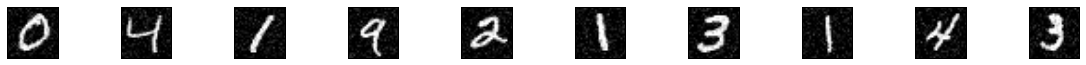

In [35]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    #ax = plt.subplot(1, n, i)
    plt.imshow(s_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

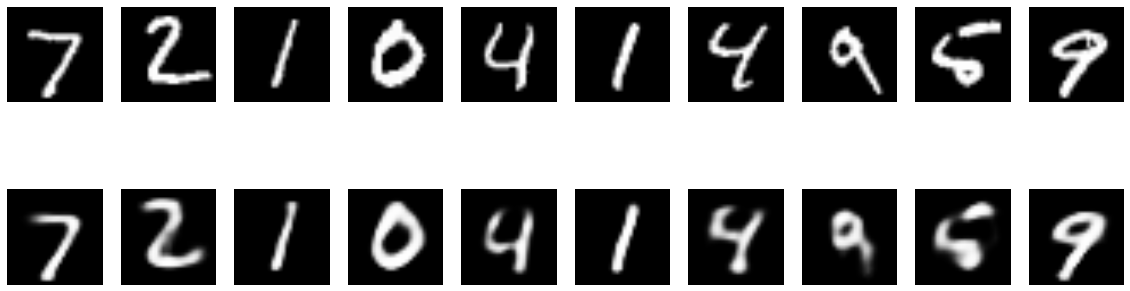

In [31]:

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_res_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(train_res_encoded_imgs, np.ravel(y_train))

In [33]:
y_pred = clf.predict(test_res_encoded_imgs)

In [34]:
num=len(test_res_encoded_imgs)
r=0
w=0
y_test = np.ravel(y_test)
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  9534 wrong:  466 error rate:  4.66 %
got correctly  95.34 %


In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
Below code is without K-FOLD

In [17]:
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                #callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s - loss: 0.2511 - val_loss: 0.2447
Epoch 2/100
60000/60000 [==============================] - 16s - loss: 0.2411 - val_loss: 0.2331
Epoch 3/100
60000/60000 [==============================] - 17s - loss: 0.2264 - val_loss: 0.2196
Epoch 4/100
60000/60000 [==============================] - 17s - loss: 0.2143 - val_loss: 0.2094
Epoch 5/100
60000/60000 [==============================] - 16s - loss: 0.2075 - val_loss: 0.2034
Epoch 6/100
60000/60000 [==============================] - 16s - loss: 0.2017 - val_loss: 0.1980
Epoch 7/100
60000/60000 [==============================] - 16s - loss: 0.1936 - val_loss: 0.1889
Epoch 8/100
60000/60000 [==============================] - 16s - loss: 0.1890 - val_loss: 0.1893
Epoch 9/100
60000/60000 [==============================] - 15s - loss: 0.1856 - val_loss: 0.1832
Epoch 10/100
60000/60000 [==============================] - 15s - loss: 0.181

In [20]:
#Predict the digits using a classifier
#Use the reduce Encoded train and test images
encoded_train_imgs = encoder.predict(x_train)
print (encoded_train_imgs.size)
print (encoded_train_imgs.shape)
print (encoded_train_imgs.nbytes)


1500000
(60000, 25)
12000000


In [21]:
encoded_test_imgs = encoder.predict(x_test)
print (encoded_test_imgs.size)
print (encoded_test_imgs.shape)
print (encoded_test_imgs.nbytes)

250000
(10000, 25)
2000000


In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(encoded_train_imgs, y_train)

In [23]:
y_pred = clf.predict(encoded_test_imgs)


In [25]:
num=len(encoded_test_imgs)
r=0
w=0
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  9387 wrong:  613 error rate:  6.13 %
got correctly  93.87 %
